In [273]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [274]:
#code adapted from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

nottestset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

generator1 = torch.Generator().manual_seed(5)

trainset, validationset = torch.utils.data.random_split(nottestset, [0.8, 0.2], generator=generator1)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

validationloader = torch.utils.data.DataLoader(validationset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [275]:
#code adapted from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)       
        self.fc1 = nn.Linear(2304, 64)             
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [276]:
model_id = 0 #choose from {0, 1, 2 ,3 ,4 ,5 ,6}

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv0 = nn.Conv2d(3, 16, 5)
        if (model_id == 2):
            self.conv1 = nn.Conv2d(16, 32, 3)
        else:
            self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)       
        self.conv3 = nn.Conv2d(64, 128, 3)
          
        if (model_id == 1):
            self.fc1 = nn.Linear(2048, 64)
        elif (model_id == 2):
            self.fc1 = nn.Linear(1600, 64)
        else:
            self.fc1 = nn.Linear(2304, 64)
            
        if (model_id == 3):
            self.fc2 = nn.Linear(128, 10)
        else:      
            self.fc2 = nn.Linear(64, 10)
        
        self.fc3 = nn.Linear(64, 128)
        
        self.dropout20 = nn.Dropout(p=0.2)
        self.dropout80 = nn.Dropout(p=0.8)
        self.batchnorm32 = nn.BatchNorm2d(32)
        self.batchnorm64 = nn.BatchNorm2d(64)
        self.batchnorm64_1d = nn.BatchNorm1d(64)

    def forward(self, x):
        if (model_id == 2):
            x = F.relu(self.conv0(x))
        x = self.pool(F.relu(self.conv1(x)))
        if (model_id == 4):
            x = self.dropout20(x)
        if (model_id == 5):
            x = self.dropout80(x)
        if (model_id == 6):
            x = self.batchnorm32(x)
        x = self.pool(F.relu(self.conv2(x)))
        if (model_id == 4):
            x = self.dropout20(x)
        if (model_id == 5):
            x = self.dropout80(x)
        if (model_id == 6):
            x = self.batchnorm64(x)
        if (model_id == 1):
            x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        if (model_id == 4):
            x = self.dropout20(x)
        if (model_id == 5):
            x = self.dropout80(x)
        if (model_id == 6):
            x = self.batchnorm64_1d(x)
        if (model_id == 3):
            x = self.fc3(x)
        x = self.fc2(x)
        
        return x


net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [277]:
#code adapted from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.995
[1,  4000] loss: 1.596
[1,  6000] loss: 1.463
[1,  8000] loss: 1.373
[1, 10000] loss: 1.284
[2,  2000] loss: 1.183
[2,  4000] loss: 1.152
[2,  6000] loss: 1.123
[2,  8000] loss: 1.071
[2, 10000] loss: 1.067
Finished Training


In [278]:
#code adapted from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the training set: {100 * correct // total} %')

Accuracy of the network on the training set: 63 %


In [279]:
correct = 0
total = 0
with torch.no_grad():
    for data in validationloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the validation set: {100 * correct // total} %')

Accuracy of the network on the validation set: 59 %


In [280]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test set: {100 * correct // total} %')

Accuracy of the network on the test set: 59 %


# Question 2

In [281]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()

Using cache found in C:\Users\simon/.cache\torch\hub\pytorch_vision_v0.10.0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

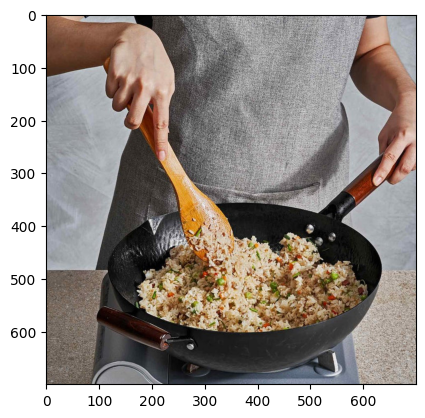

In [282]:
image_id = 2
images = ['cat.jpg', 'castle.jpg', 'wok.jpg']
classes = [281, 483, 909]

filename = images[image_id]

from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)

plt.figure()
plt.imshow(input_image) 
plt.show()

In [283]:
def classify(input_image):
    preprocess = transforms.Compose([
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)

    with torch.no_grad():
        output = model(input_batch)

    probabilities = torch.nn.functional.softmax(output[0], dim=0)      
    with open("imagenet_classes.txt", "r") as f:
        categories = [s.strip() for s in f.readlines()]
    
    top5_prob, top5_catid = torch.topk(probabilities, 3)
    for i in range(top5_prob.size(0)):
        print(categories[top5_catid[i]], top5_prob[i].item())

In [284]:
def get_probability(input_image):
    preprocess = transforms.Compose([
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)

    with torch.no_grad():
        output = model(input_batch)

    probabilities = torch.nn.functional.softmax(output[0], dim=0)      
    return probabilities[classes[image_id]]

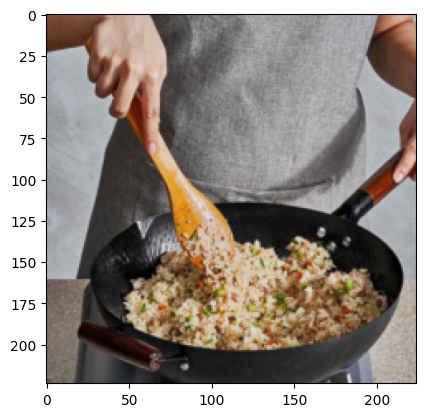

In [285]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
data = preprocess(input_image)

plt.figure()
plt.imshow(data.permute(1, 2, 0))
plt.show()

In [286]:
classify(data)

wok 0.8341544270515442
caldron 0.07026411592960358
Dutch oven 0.037987735122442245


In [287]:
def occlude(x, y):
    boxsize = 30   
    new = data.clone().detach()
    new[:, max(0, x-boxsize):min(data.size()[1], x+boxsize), max(0, y-boxsize):min(y+boxsize,data.size()[2])] = 0.5 
    return new

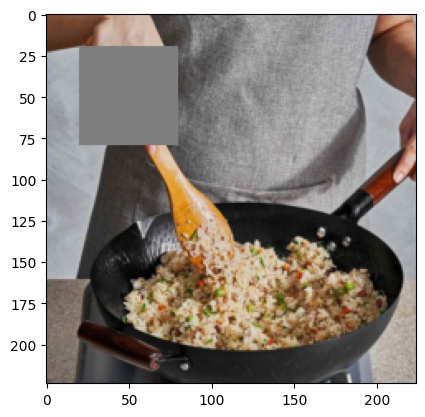

In [288]:
plt.figure()
plt.imshow(occlude(50,50).permute(1, 2, 0))
plt.show()

In [289]:
blockstride = 5
max_x = int(np.ceil(data.size()[1]/blockstride))
max_y = int(np.ceil(data.size()[2]/blockstride))

saliency_map = np.zeros([max_x, max_y])
for i in range(max_x):
    for j in range(max_y):
        saliency_map[i, j] = get_probability(occlude(i*blockstride, j*blockstride))
        
    print(i)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [290]:
saliency_map.max()

0.9704777598381042

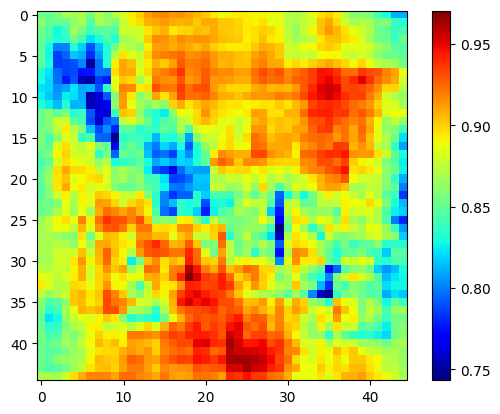

In [291]:
plt.figure
plt.imshow(saliency_map, cmap='jet')
plt.colorbar()
plt.show()

# Question 3

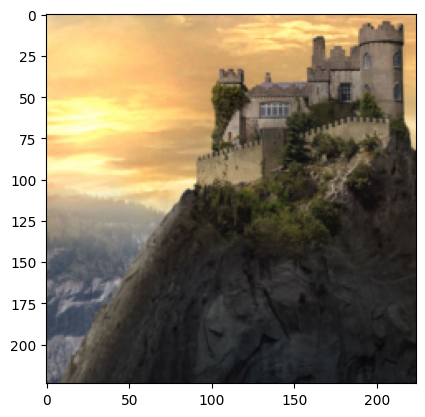

In [292]:
image_id = 1
filename = images[image_id]
input_image = Image.open(filename)

new_image = Image.open(filename)
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
    ])
data = preprocess(input_image)

plt.figure()
plt.imshow(data.permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


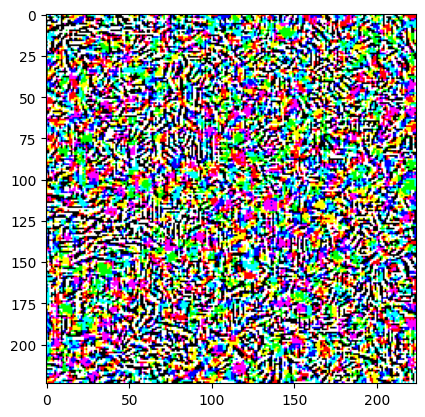

In [293]:
#code adapted from https://pytorch.org/tutorials/beginner/fgsm_tutorial.html

epsilon = 0.007

preprocess = transforms.Compose([
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
processed_data = preprocess(data)
input_batch = processed_data.unsqueeze(0)
input_batch.requires_grad = True

output = model(input_batch)
loss = F.nll_loss(output, torch.tensor([classes[image_id]]))

model.zero_grad()
loss.backward()
data_grad = input_batch.grad.data.squeeze(0)
sign_data_grad = data_grad.sign()

plt.figure()
plt.imshow((sign_data_grad).permute(1, 2, 0))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


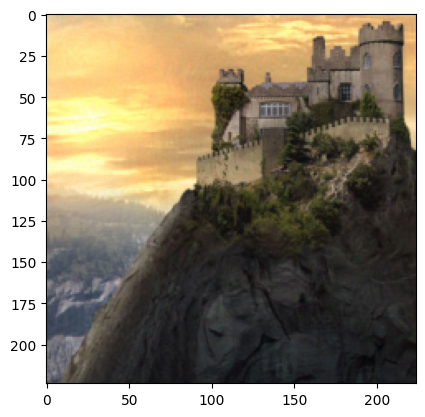

In [294]:
perturbed_data = data + epsilon*sign_data_grad

plt.figure()
plt.imshow((perturbed_data).permute(1, 2, 0))
plt.show()

In [295]:
processed_perturbed_data = preprocess(perturbed_data).unsqueeze(0)

output = model(processed_perturbed_data)

probabilities = torch.nn.functional.softmax(output[0], dim=0)

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

fur coat 0.06071184575557709
totem pole 0.05356856435537338
fountain 0.045298825949430466
dome 0.028300229460000992
quilt 0.027309052646160126
